In [16]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [17]:
X = np.logspace(1,15,10000) # freq

In [18]:
h = 6.626070040e-34; k = 1.38064852e-23; c = 299792458.0; T =300.0
hkTX = (h*X)/(k*T)
B = 2 * h/np.square(c) * np.power(X,3) * 1/(np.exp(hkTX)-1) # Planck's law
B = B/(X)

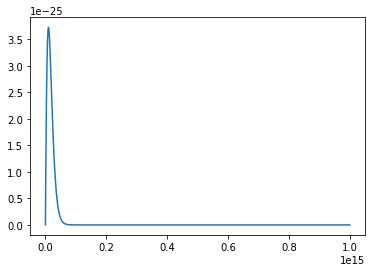

In [19]:
plt.plot(X,B)

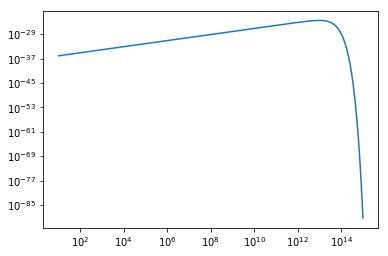

In [20]:
plt.loglog(X,B)

In [21]:
from scipy.optimize import curve_fit

In [26]:
# Hacked version (or frequency version) and 3D of equation number 32 from the paper: 
# https://facultystaff.richmond.edu/~olipan/Chandrashekhar.pdf
# corresponding to random walk with absorbing wall @ x
def func(X, a, D, b): 
    return X*X*X*h*k * 1/2 * 1/np.power(X/(3.14*D),3/2) * np.exp(-X/(4*D)*np.square(a)) * 1/np.power((1-np.exp(-b*X)),2/2)

In [27]:
# time version of eq. 32: x/t * 1/2 * 1/np.sqrt(3.14*D*t) * np.exp(-1/(4*D*t)*np.square(x))

In [28]:
popt, pcov = curve_fit(func, X, B, p0=[0.5, 1e12, 1e-1], maxfev=2000)

/Users/nshetty/anaconda3/lib/python3.6/site-packages/scipy/optimize/minpack.py:779: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


In [29]:
popt

array([  1.05949589e-02,   1.78321768e+08,   6.39021714e+00])

In [30]:
F = func(X, *popt)

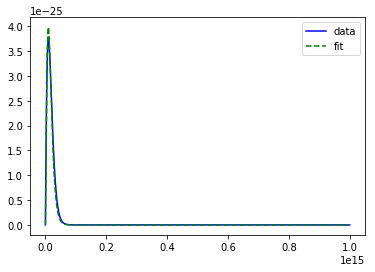

In [31]:
plt.plot(X, B, 'b-', label='data')
plt.plot(X, F, 'g--', label='fit')
plt.legend()

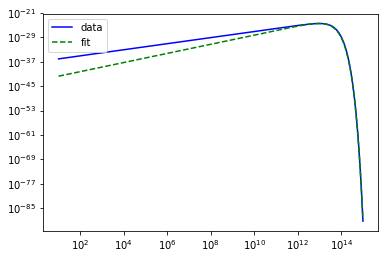

In [32]:
plt.loglog(X, B, 'b-', label='data')
plt.loglog(X, func(X, *popt), 'g--', label='fit')
plt.legend()

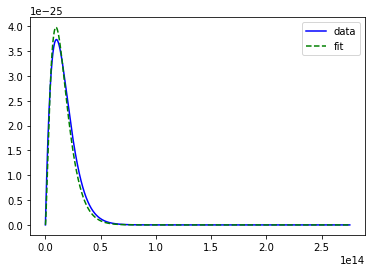

In [33]:
cut = 9600
plt.plot(X[:cut], B[:cut], 'b-', label='data')
plt.plot(X[:cut], F[:cut], 'g--', label='fit')
plt.legend()